# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [9]:
import numpy as np
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
#X, y = mnist['data'], mnist['target']

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Now take a look at the shapes of the X and y matricies 

In [11]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [12]:
# Picking one entry from the dataset (using indexing to pick the 36000th entry)

X.loc[[36000]]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
36000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

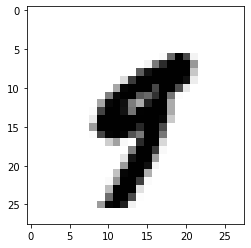

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.loc[[36000]] # pick the 36000th entry
some_digit_image = some_digit.values.reshape(28, 28) # reshape the entry to 28x28

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest") # plot the entry

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [14]:
# Using indexing to see if what the plot shows matches with the outcome of the 36000th index :

y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [15]:
# Now lets break into a test train split to run a classification by using indexing to select the first 60000 entries for the training, and the rest for training :

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Explanation of the code above :

# X[:60000] means that we are selecting the first 60000 entries of the dataset X
# X[60000:] means that we are selecting the rest of the entries of the dataset X
# y[:60000] means that we are selecting the first 60000 entries of the dataset y
# y[60000:] means that we are selecting the rest of the entries of the dataset y

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [16]:
y_train_5 = np.where(y_train == '5', 1, 0) # convert the y_train dataset to a binary dataset, where 1 is 5 and 0 is not 5
y_test_5 = np.where(y_test == '5', 1, 0) # convert the y_test dataset to a binary dataset, where 1 is 5 and 0 is not 5

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [17]:
# Training a logistic regression to predict if a number is 5 or not (remember to use the 'just 5s' y training set!):

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

log_model = LogisticRegression() 

## Data splitting
trans=PowerTransformer()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train_5 )

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [20]:
# Testing log_model on the 36000th digit :

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)


In [21]:
y_pred_train_log[36000] # prediction on the 36000th digit of the training set

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [22]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [23]:
# fiting Never5Classifier to the training set :

never_5_clf.fit(X_train_mod, y_train_5)

In [24]:
# predicting on the testing set using Never5Classifier :

y_pred_test_never5 = never_5_clf.predict(X_test_mod)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [25]:
y_train_5

array([1, 0, 0, ..., 1, 0, 0])

,Error_metric,Train,Test
0,Accuracy,0.975283,0.975500
1,Precision,0.906818,0.914213
2,Recall,0.809629,0.800448


Confusion matrix for the train set
[[54128   451]
 [ 1032  4389]]


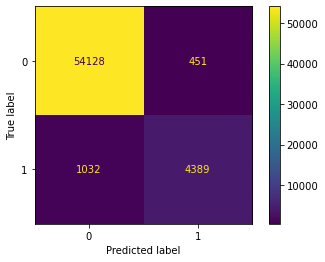

Confusion matrix for the test set
[[9041   67]
 [ 178  714]]


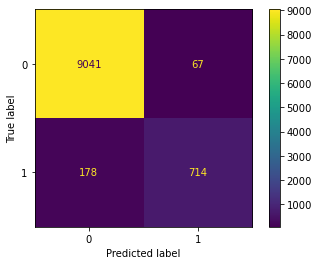

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5, y_pred_train_log),
                                         precision_score(y_train_5, y_pred_train_log),
                                         recall_score(y_train_5, y_pred_train_log)],
                               'Test': [accuracy_score(y_test_5, y_pred_test_log),
                                        precision_score(y_test_5, y_pred_test_log),
                                        recall_score(y_test_5, y_pred_test_log)]})
display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train_5,y_pred_train_log))
cm_train = confusion_matrix(y_train_5, y_pred_train_log)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(values_format = 'd')
plt.show()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_5, y_pred_test_log))
cm_test = confusion_matrix(y_test_5, y_pred_test_log)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(values_format = 'd')
plt.show()


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


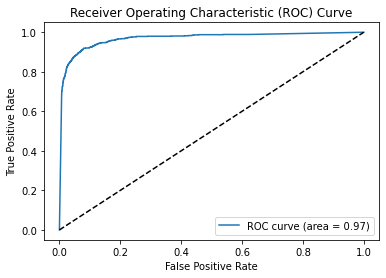

In [31]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the test set
probs = log_model.predict_proba(X_test)[:, 1]
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5, probs)
# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?